In [16]:
from open3d.cpu.pybind.visualization import Visualizer, RenderOption
import laspy
import numpy as np
import open3d as o3d
import open3d.core as o3c

from point_cloud_segmentation.config import RAW_DATA_DIR

device = o3c.Device("CUDA:0")

print(device)

def visualize_geometries(geometries, colors=None, show_normal=False):
    if colors is None:
        colors = plt.get_cmap("gist_rainbow")
    # logger.info(len(pcd.points))
    visualizer: Visualizer = o3d.visualization.Visualizer()
    visualizer.create_window()

    if not isinstance(geometries, list):
        geometries = [geometries]

    for i, geom in enumerate(geometries):
        if hasattr(geom, 'paint_uniform_color'):
            color = cmap(i / len(geometries))[:3]
            geom.paint_uniform_color(color)
        visualizer.add_geometry(geom)

    vis_opt: RenderOption = visualizer.get_render_option()
    vis_opt.background_color = (0.3, 0.3, 0.3)
    vis_opt.point_show_normal = show_normal

    visualizer.run()
    visualizer.destroy_window()


CUDA:0


In [3]:
las = laspy.read(RAW_DATA_DIR / "wkd-house_1_8xds.laz")
print(np.unique(las.classification))


[0]


In [4]:
points = np.vstack((las.x, las.y, las.z)).transpose()

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

print(pcd)

PointCloud with 70775329 points.


In [7]:
voxel_size = 0.05
ds_pcd = pcd.voxel_down_sample(voxel_size=voxel_size)

In [8]:
o3d.visualization.draw_geometries([ds_pcd])


Estimated coefficients (true, linear regression, RANSAC):


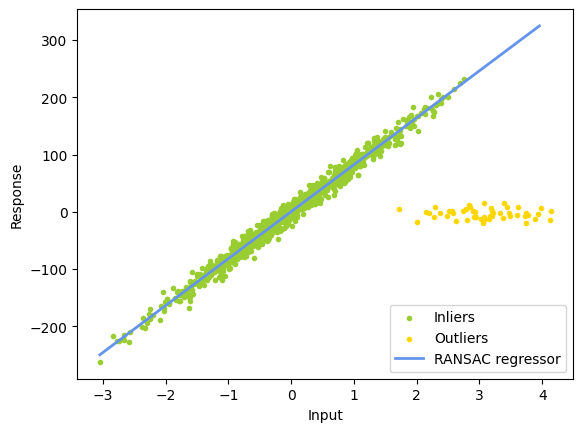

In [15]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model

n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()
